In [42]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

pd.set_option('display.max_columns', 1000)

**Archivo de trabajo:** datos de población de los condados.
En este [link](https://www.openintro.org/data/index.php?data=county_complete) encontrarán la descripción de los campos.


In [ ]:
!wget https://www.openintro.org/data/csv/county_complete.csv

--2020-10-15 02:58:29--  https://www.openintro.org/data/csv/county_complete.csv
Resolving www.openintro.org (www.openintro.org)... 192.185.65.127
Connecting to www.openintro.org (www.openintro.org)|192.185.65.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2283139 (2.2M) [text/csv]
Saving to: ‘county_complete.csv’

county_complete.csv 100%[===================>]   2.18M  6.41MB/s    in 0.3s    

2020-10-15 02:58:30 (6.41 MB/s) - ‘county_complete.csv’ saved [2283139/2283139]



In [2]:
condados = pd.read_csv('county_complete.csv')

In [3]:
condados.columns.values

array(['state', 'name', 'FIPS', 'pop2000', 'pop2010', 'pop2011',
       'pop2012', 'pop2013', 'pop2014', 'pop2015', 'pop2016', 'pop2017',
       'age_under_5_2010', 'age_under_5_2017', 'age_under_18_2010',
       'age_over_65_2010', 'age_over_64_2017', 'median_age_2017',
       'female_2010', 'white_2010', 'black_2010', 'black_2017',
       'native_2010', 'native_2017', 'asian_2010', 'asian_2017',
       'pac_isl_2010', 'pac_isl_2017', 'other_single_race_2017',
       'two_plus_races_2010', 'two_plus_races_2017', 'hispanic_2010',
       'hispanic_2017', 'white_not_hispanic_2010',
       'white_not_hispanic_2017', 'speak_english_only_2017',
       'no_move_in_one_plus_year_2010', 'foreign_born_2010',
       'foreign_spoken_at_home_2010', 'women_16_to_50_birth_rate_2017',
       'hs_grad_2010', 'hs_grad_2016', 'hs_grad_2017',
       'some_college_2016', 'some_college_2017', 'bachelors_2010',
       'bachelors_2016', 'bachelors_2017', 'veterans_2010',
       'veterans_2017', 'mean_work_tr

In [43]:
condados.head()

,state,name,FIPS,pop2000,pop2010,pop2011,pop2012,pop2013,pop2014,pop2015,pop2016,pop2017,age_under_5_2010,age_under_5_2017,age_under_18_2010,age_over_65_2010,age_over_64_2017,median_age_2017,female_2010,white_2010,black_2010,black_2017,native_2010,native_2017,asian_2010,asian_2017,pac_isl_2010,pac_isl_2017,other_single_race_2017,two_plus_races_2010,two_plus_races_2017,hispanic_2010,hispanic_2017,white_not_hispanic_2010,white_not_hispanic_2017,speak_english_only_2017,no_move_in_one_plus_year_2010,foreign_born_2010,foreign_spoken_at_home_2010,women_16_to_50_birth_rate_2017,hs_grad_2010,hs_grad_2016,hs_grad_2017,some_college_2016,some_college_2017,bachelors_2010,bachelors_2016,bachelors_2017,veterans_2010,veterans_2017,mean_work_travel_2010,mean_work_travel_2017,broadband_2017,computer_2017,housing_units_2010,homeownership_2010,housing_multi_unit_2010,median_val_owner_occupied_2010,households_2010,households_2017,persons_per_household_2010,persons_per_household_2017,per_capita_income_2010,per_capita_income_2017,metro_2013,median_household_income_2010,median_household_income_2016,median_household_income_2017,private_nonfarm_establishments_2009,private_nonfarm_employment_2009,percent_change_private_nonfarm_employment_2009,nonemployment_establishments_2009,firms_2007,black_owned_firms_2007,native_owned_firms_2007,asian_owned_firms_2007,pac_isl_owned_firms_2007,hispanic_owned_firms_2007,women_owned_firms_2007,manufacturer_shipments_2007,mercent_whole_sales_2007,sales_2007,sales_per_capita_2007,accommodation_food_service_2007,building_permits_2010,fed_spending_2009,area_2010,density_2010,smoking_ban_2010,poverty_2010,poverty_2016,poverty_2017,poverty_age_under_5_2017,poverty_age_under_18_2017,civilian_labor_force_2007,employed_2007,unemployed_2007,unemployment_rate_2007,civilian_labor_force_2008,employed_2008,unemployed_2008,unemployment_rate_2008,civilian_labor_force_2009,employed_2009,unemployed_2009,unemployment_rate_2009,civilian_labor_force_2010,employed_2010,unemployed_2010,unemployment_rate_2010,civilian_labor_force_2011,employed_2011,unemployed_2011,unemployment_rate_2011,civilian_labor_force_2012,employed_2012,unemployed_2012,unemployment_rate_2012,civilian_labor_force_2013,employed_2013,unemployed_2013,unemployment_rate_2013,civilian_labor_force_2014,employed_2014,unemployed_2014,unemployment_rate_2014,civilian_labor_force_2015,employed_2015,unemployed_2015,unemployment_rate_2015,civilian_labor_force_2016,employed_2016,unemployed_2016,unemployment_rate_2016,uninsured_2017,uninsured_age_under_6_2017,uninsured_age_under_19_2017,uninsured_age_over_74_2017,civilian_labor_force_2017,employed_2017,unemployed_2017,unemployment_rate_2017
0,Alabama,Autauga County,1001,43671.0,54571,55199.0,54927.0,54695.0,54864.0,54838.0,55278.0,55504.0,6.6,5.7,26.8,12.0,14.3,37.8,51.3,78.5,17.7,9.55,0.4,0.15,0.9,0.47,NaN,0.04,0.65,1.6,0.84,2.4,2.67,77.2,75.42,96.2,86.3,2.0,3.7,7.4,85.3,87.6,87.7,28.7,29.1,21.7,24.6,25.0,5817,12.6,25.1,25.8,76.6,86.2,22135,77.5,7.2,133900.0,19718,21054.0,2.70,2.59,24568,27841.70,1.0,53255,54487.0,55317.0,877,10628,16.6,2971.0,4067.0,15.2,NaN,1.3,NaN,0.7,31.7,NaN,NaN,598175.0,12003.0,88157.0,191,331142.0,594.44,91.8,none,10.6,13.5,13.7,17.2,20.0,24383.0,23577.0,806.0,3.31,24687.0,23420.0,1267.0,5.13,24703.0,22301.0,2402.0,9.72,25713.0,23431.0,2282.0,8.87,25836.0,23677.0,2159.0,8.36,25740.0,23961.0,1779.0,6.91,25810.0,24205.0,1605.0,6.22,25602.0,24107.0,1495.0,5.84,25602.0,24272.0,1330.0,5.19,25918.0,24593.0,1325.0,5.11,8.8,1.1,3.2,0.0,25909.0,24908.0,1001.0,3.86
1,Alabama,Baldwin County,1003,140415.0,182265,186534.0,190048.0,194736.0,199064.0,202863.0,207509.0,212628.0,6.1,5.7,23.0,16.8,19.0,42.6,51.1,85.7,9.4,4.77,0.7,0.41,0.7,0.35,NaN,0.00,0.39,1.5,0.82,4.4,4.44,83.5,83.08,94.5,83.0,3.6,5.5,5.1,87.6,90.0,90.2,31.8,31.6,26.8,29.5,30.7,20396,11.9,25.8,27.0,74.5,86.9,104061,76.7,22.6,177200.0,69476,76133.0,2.50,2.63,26469,27779.85,1.0,50147,56460.0,52562.0,4812,52233,17.4,14175.0,19035.0,2.7,0.4,1.0,NaN,1.3,27.3,141027

* Realice los histogramas de frecuencias de la población de estados unidos para el 2010 y el 2017. Compare sus valores medios.

In [ ]:
#Ingrese su código aquí

In [6]:
matriz = pd.DataFrame.to_numpy(condados)

In [9]:
print(np.unique(matriz[:,4]))
print(np.unique(matriz[:,11]))

[82 90 286 ... 4092459 5194675 9818605]
[88.0 134.0 296.0 ... 4652980.0 5211263.0 10163507.0]


In [14]:
frecuencia = np.unique(condados.pop2010, return_counts=True)
frecuencia

(array([     82,      90,     286, ..., 4092459, 5194675, 9818605],
       dtype=int64),
 array([1, 1, 1, ..., 1, 1, 1], dtype=int64))

In [12]:
frecuencia = np.unique(condados.pop2017, return_counts=True)
frecuencia

(array([ 88., 134., 296., ...,  nan,  nan,  nan]),
 array([1, 1, 1, ..., 1, 1, 1], dtype=int64))

<function matplotlib.pyplot.show(*args, **kw)>

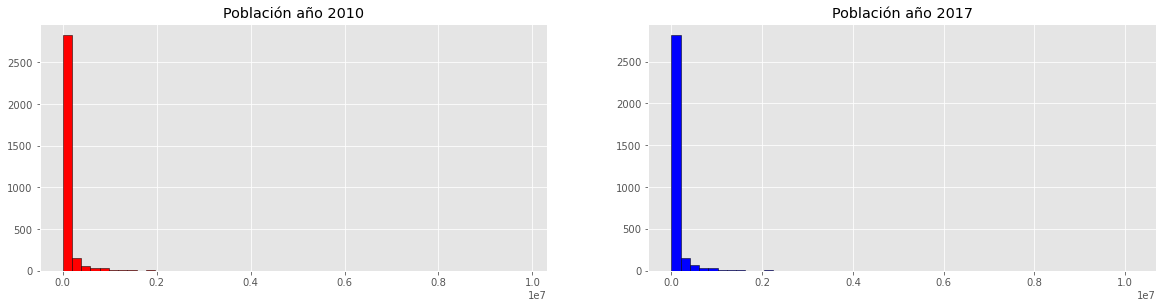

In [27]:
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.hist(matriz[:,4], color='r', edgecolor='k', bins=50)
plt.title('Población año 2010')
plt.subplot(222)
plt.hist(matriz[:,11], color='b', edgecolor='k', bins=50)
plt.title('Población año 2017')
plt.show

In [30]:
name = np.unique(condados.name)
len(name)

1877

In [34]:
print(f'El valor promedio 2010 es {np.mean(matriz[:,4])}')
print(f'El valor promedio 2017 es {np.mean(condados.pop2017)}')

El valor promedio 2010 es 98262.03564608529
El valor promedio 2017 es 103763.41350748646


In [35]:
pro2010 = np.mean(matriz[:,4])
pro2017 = np.mean(condados.pop2017)

pro = pro2017 - pro2010
pro #crecimiento de la población 

5501.377861401168

* Realizar las serie de tiempo 2010 al 2017

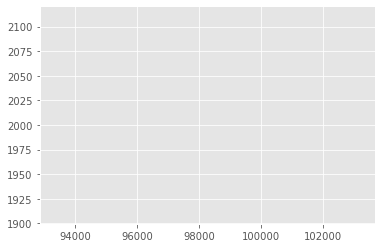

In [52]:
pob_promedio = np.array(condados.iloc[:,4:12]).mean(axis=0)
year = np.array(range(2010, 2018))

plt.plot(pob_promedio, year)


* Realice el gráfico del promedio de personas empleadas desde el 2007 al 2017.

In [ ]:
#Ingrese su código aquí

In [50]:
columnas = condados.columns.values
col_sel = [c for c in columnas if c.startswith('employed')]
employed_mean = np.array(condados[col_sel].mean(axis=0))
year = np.array(range(2007, 2018))

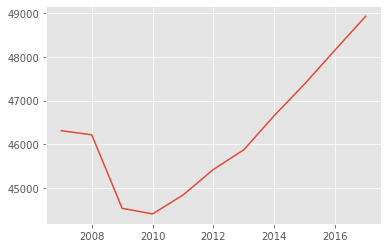

In [51]:
plt.plot(year, employed_mean)

* Realice la distribución de desempleo de los años 2010 y 2017. Calcule la curtosis y el coeficiente de asimetría de Fisher

In [ ]:
#Ingrese su código aquí

* Cuales son los 4 condados con mayor tasa de desempleo en el 2017. Para estos haga un gráfico de barras apiladas para observar el comportamiento en el periodo 2012 - 2017. 

In [ ]:
#Ingrese su código aquí

* Realice la matriz de correlación de pearson para todas las variables. Escoja dos de ellas que tengan una correlación mayor a 0.8 y realice un ajuste por mínimos cuadrados. Encuentre la pendiente y el punto de corte.

In [ ]:
#Ingrese su código aquí